**Análise Exploratória - tech chalenge**

O dataset Gestational_Diabetes.csv reúne informações clínicas, antropométricas e reprodutivas de mulheres gestantes, com o objetivo de avaliar fatores associados à ocorrência de Diabetes Gestacional.

[Dataset que utilizamos para análise](https://www.kaggle.com/datasets/rasooljader/gestational-diabetes)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizamos algumas bibliotecas da linguagem *python*, como o **pandas** para facilitar a leitura do arquivo csv, pois ela é empregada em estudos no tartamento de dados tabulares, já o **matplobit** utilizamos para a construção e personalizaçao gráfica a fim de facilitar a interpretação dos resultados e por fim utilizamos também o **seaborn**, pois ele proporciona graficos mais intuitivos, e uma correlação maior entre variaveis.

In [2]:
gestacional = pd.read_csv('Gestational_Diabetes.csv')

gestacional.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0


Carregamos o dataset, e podemos perceber algumas variaveis  que incluem a idade, número de gestações, peso, altura, índice de massa corporal (IMC), histórico familiar de diabetes e a variável alvo (Prediction), que ***indica a presença ou ausência de Diabetes Gestacional***. Com isso percebemos a estrutura do csv, os tipos de variáveis para que

In [3]:
gestacional['Pregnancy No'].unique()

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

Essa variável Pregnancy permite avaliar a relação entre o histórico gestacional e a ocorrência de Diabetes Gestacional.

In [4]:
gestacional.describe()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,30.357708,2.517787,72.988142,158.154150,29.256818,0.226285,0.214427
std,7.022960,1.530656,12.552712,7.367421,5.092321,0.418632,0.410627
min,16.000000,1.000000,43.000000,135.000000,16.000000,0.000000,0.000000
25%,24.000000,1.000000,64.750000,153.000000,25.700000,0.000000,0.000000
50%,30.000000,2.000000,70.000000,158.000000,28.900000,0.000000,0.000000
75%,36.000000,3.000000,80.000000,164.000000,32.000000,0.000000,0.000000
max,45.000000,9.000000,126.000000,196.000000,54.300000,1.000000,1.000000


Essa função fornece uma visão geral da distribuição e do perfil clínico da amostra, como podemos perceber nessa análise, o dataset é composto por 1012 gestantes, com idade média de 30 anos. Cerca de 22,6% das gestantes apresentam histórico familiar de diabetes, e aproximadamente 21,4% foram classificadas com Diabetes Gestacional, conforme a variável Prediction.

In [5]:
gestacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1012 non-null   float64
 1   Pregnancy No  1012 non-null   float64
 2   Weight        1012 non-null   float64
 3   Height        1012 non-null   float64
 4   BMI           1012 non-null   float64
 5   Heredity      1012 non-null   int64  
 6   Prediction    1012 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 55.5 KB


Uilizamos função info() para verificar a estrutura do real do dataset, como número de variavéis que no caso são 7, e 1012 registros, algumas no formato float e outras int. Uma informação importante para análise, pois dependendo do tipo, temos que alterar para facilitar a análise.

O gráfico abaixo apresenta a correlação entre variáveis numéricas do conjunto de dados gestacional e a variável alvo Prediction, que indica a ocorrência de Diabetes Gestacional.
Cada barra representa o grau de relação linear entre um fator e a presença de diabetes. Os valores mais altos (positivos) indicam que, à medida que o fator aumenta, a probabilidade de diabetes também tende a aumentar. Já os valores próximos de zero indicam pouca ou nenhuma relação linear.
Os fatores estão ordenados do mais correlacionado para o menos correlacionado, facilitando a identificação dos atributos que mais contribuem para a incidência da doença.
É importante destacar que correlação não implica causalidade. Isso significa que o gráfico não prova que esses fatores causam diabetes gestacional, apenas indica que estão estatisticamente associados à sua ocorrência no conjunto de dados analisado.
Por fim, as principais funções desse gráfico são:

*	Identificar variáveis relevantes para modelos preditivos,

*	Apoiar análises exploratórias de dados (EDA) e

*	Direcionar estudos clínicos ou estatísticos mais aprofundados.


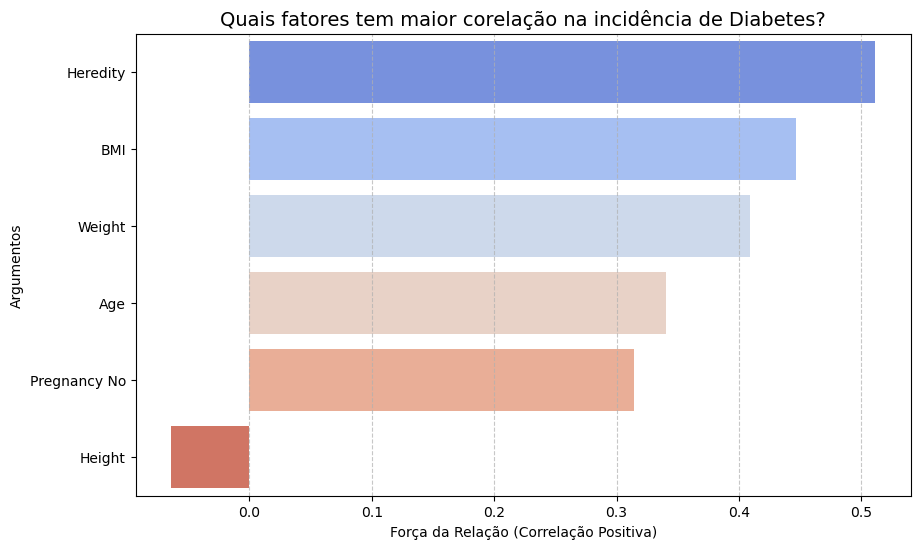

In [6]:
df_numerico = gestacional.select_dtypes(include=['number'])

ranking = df_numerico.corr()['Prediction'].drop('Prediction').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=ranking.values,
    y=ranking.index,
    hue=ranking.index,
    palette='coolwarm',
    legend=False
)

plt.title("Quais fatores tem maior corelação na incidência de Diabetes?", fontsize=14)
plt.xlabel("Força da Relação (Correlação Positiva)")
plt.ylabel("Argumentos")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [7]:
gestacional.Age.describe()

count    1012.000000
mean       30.357708
std         7.022960
min        16.000000
25%        24.000000
50%        30.000000
75%        36.000000
max        45.000000
Name: Age, dtype: float64

In [8]:
gestacional.Age.unique()

array([17., 16., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       30., 31., 32., 33., 34., 29., 39., 35., 38., 36., 37., 40., 44.,
       45., 43., 41., 42.])

Aqui realizamos uma análise dos valores unicos, e constatamos que elas variam entre 16 e 45 anos. Com isso permite avaliar a influência da idade materna como fator associado a ocorrência de diabetes gestacional.

In [9]:
gestacional['Age'].min(), gestacional['Age'].max()


(16.0, 45.0)

In [10]:
bmi_calc = gestacional['Weight'] / ( (gestacional['Height']/100)**2 )
diff = (bmi_calc - gestacional['BMI']).abs()
diff.describe()


count    1012.000000
mean        0.024582
std         0.015135
min         0.000000
25%         0.011111
50%         0.023894
75%         0.037604
max         0.050000
dtype: float64

Realizamos um calculo do IMC para verificar se o dataset esta realmente correto, e realizando esse recalculo entre a informação original do dataset e este bmi_calc, percebemos que a diferença de valor é mínima, garantindo a confiabilidade dos dados.

In [11]:
rate = (gestacional
        .groupby('Pregnancy No')['Prediction']
        .mean()
        .sort_index())

rate




Pregnancy No
1.0    0.090909
2.0    0.146032
3.0    0.310734
4.0    0.285714
5.0    0.533333
6.0    0.500000
7.0    0.500000
8.0    1.000000
9.0    0.333333
Name: Prediction, dtype: float64

A análise indica que a proporção de Diabetes Gestacional tende a aumentar conforme o número de gestações, sugerindo uma associação entre histórico gestacional e maior risco metabólico, embora valores extremos possam refletir tamanhos amostrais reduzidos.

In [12]:
count = gestacional['Pregnancy No'].value_counts().sort_index()

count

Pregnancy No
1.0    297
2.0    315
3.0    177
4.0    119
5.0     45
6.0     34
7.0     18
8.0      4
9.0      3
Name: count, dtype: int64

Percebe-se que quanto maior o número de gestção, menor é a quantidade de mulheres na amostra, o que nos deixar mais cautelosos, pois percentuais muito altos em grupos com poucas mulheres podem ocorrer devido ao tamanho reduzido da amostra, e não necessariamente indicar maior risco absoluto.

In [13]:
summary = pd.DataFrame({
    'n': count,
    'rate_diabetes': rate
})

summary

,n,rate_diabetes
Pregnancy No,,
1.0,297,0.090909
2.0,315,0.146032
3.0,177,0.310734
4.0,119,0.285714
5.0,45,0.533333
6.0,34,0.500000
7.0,18,0.500000
8.0,4,1.000000
9.0,3,0.333333


In [14]:
def outliers_iqr(df, cols, k=1.5):
    out = {}
    for c in cols:
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        low = q1 - k*iqr
        high = q3 + k*iqr
        idx = df[(df[c] < low) | (df[c] > high)].index
        out[c] = {"low": low, "high": high, "count": len(idx), "idx": idx}
    return out

cols2 = ['Age','Pregnancy No','Weight','Height','BMI']
out2 = outliers_iqr(gestacional, cols2)

for c, info in out2.items():
    print(c, "outliers:", info["count"], "limites:", (round(info["low"],2), round(info["high"],2)))


Age outliers: 0 limites: (6.0, 54.0)
Pregnancy No outliers: 25 limites: (-2.0, 6.0)
Weight outliers: 23 limites: (41.88, 102.88)
Height outliers: 4 limites: (136.5, 180.5)
BMI outliers: 18 limites: (16.25, 41.45)


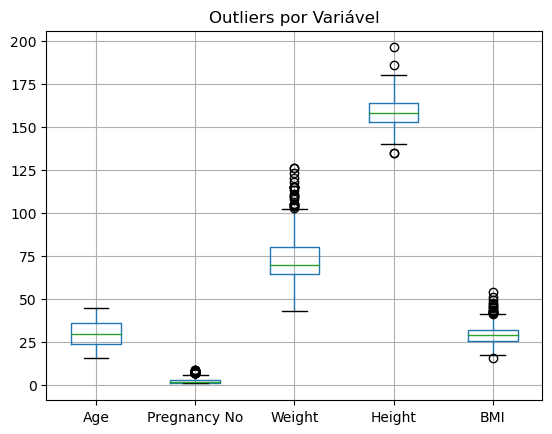

In [15]:

gestacional[cols2].boxplot()
plt.title("Outliers por Variável")
plt.show()

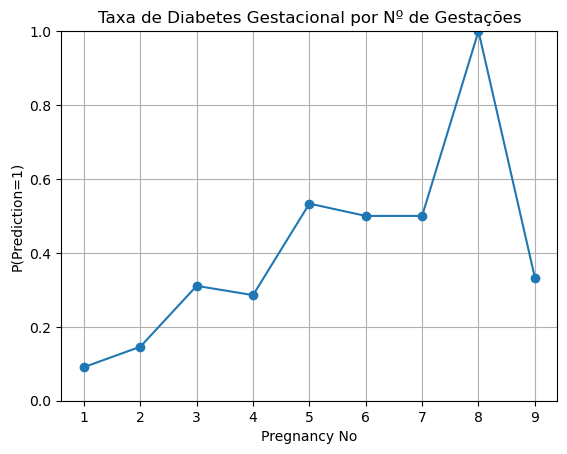

In [16]:
import matplotlib.pyplot as plt

summary['rate_diabetes'].plot(marker='o')
plt.title("Taxa de Diabetes Gestacional por Nº de Gestações")
plt.xlabel("Pregnancy No")
plt.ylabel("P(Prediction=1)")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [17]:
gestacional['preg_bin'] = pd.cut(
    gestacional['Pregnancy No'],
    bins=[0,1,2,4,10],
    labels=['1','2','3-4','5+']
)

summary_bin = gestacional.groupby('preg_bin', observed=False)['Prediction'].agg(['count','mean'])
summary_bin.rename(columns={'count':'n','mean':'rate_diabetes'})

,n,rate_diabetes
preg_bin,,
1,297,0.090909
2,315,0.146032
3-4,296,0.300676
5+,104,0.528846


intervalo de confiança de proporção (Wilson):

In [18]:
from statsmodels.stats.proportion import proportion_confint

def prop_ci(df, group_col):
    rows = []

    for g, sub in df.groupby(group_col, observed=False):
        n = len(sub)
        k = sub['Prediction'].sum()
        rate = k/n
        low, high = proportion_confint(k, n, method='wilson')
        rows.append([g, n, rate, low, high])
    return pd.DataFrame(rows, columns=[group_col, 'n', 'rate', 'ci_low', 'ci_high'])

ci_table = prop_ci(gestacional, 'preg_bin')
ci_table

,preg_bin,n,rate,ci_low,ci_high
0,1,297,0.090909,0.063230,0.129035
1,2,315,0.146032,0.111301,0.189292
2,3-4,296,0.300676,0.251264,0.355195
3,5+,104,0.528846,0.433602,0.622035


Teste de tendência (ordem importa) com método apropriado

In [19]:
from scipy.stats import spearmanr
rho, p = spearmanr(gestacional['Pregnancy No'], gestacional['Prediction'])
rho, p

(0.3005980375071056, 1.402129165833077e-22)

In [20]:
import statsmodels.api as sm
import numpy as np

X = gestacional[['Pregnancy No','Age','BMI','Heredity']]
X = sm.add_constant(X)
y = gestacional['Prediction']

model = sm.Logit(y, X).fit(disp=False)

or_preg = np.exp(model.params['Pregnancy No'])
pval = model.pvalues['Pregnancy No']
or_preg, pval


(0.9591184732593393, 0.6041742131819758)

In [21]:
gestacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           1012 non-null   float64 
 1   Pregnancy No  1012 non-null   float64 
 2   Weight        1012 non-null   float64 
 3   Height        1012 non-null   float64 
 4   BMI           1012 non-null   float64 
 5   Heredity      1012 non-null   int64   
 6   Prediction    1012 non-null   int64   
 7   preg_bin      1012 non-null   category
dtypes: category(1), float64(5), int64(2)
memory usage: 56.7 KB


In [22]:
gestacional.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction,preg_bin
0,17.0,1.0,48.0,165.0,17.6,0,0,1
1,17.0,1.0,49.0,145.0,23.3,0,0,1
2,17.0,1.0,50.0,140.0,25.5,0,0,1
3,17.0,1.0,50.0,145.0,23.8,0,0,1
4,17.0,1.0,49.0,146.0,23.0,0,0,1


In [23]:
df_gestacional = gestacional.drop( 'preg_bin' ,axis = 1 )

In [24]:
df_gestacional.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0


In [25]:
df_gestacional.shape

(1012, 7)

In [26]:
df_gestacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1012 non-null   float64
 1   Pregnancy No  1012 non-null   float64
 2   Weight        1012 non-null   float64
 3   Height        1012 non-null   float64
 4   BMI           1012 non-null   float64
 5   Heredity      1012 non-null   int64  
 6   Prediction    1012 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 55.5 KB


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Análise do Gráfico de Correlação para a Diabetes Gestacional

Este gráfico é um **Mapa de Calor (Heatmap)**. Os números variam de **-1 a 1**:
* **Próximo de 1 (Cores claras):** Correlação forte e positiva.
* **Próximo de 0 (Cores escuras):** Sem correlação.
* **Próximo de -1:** Correlação negativa.

### Principais correlações para a coluna `Prediction`
A ordem de importância dos fatores de risco para diabetes gestacional neste dataset é:

1.  **Heredity (0.51):** É o **fator mais forte**. O histórico familiar é o indicador que mais impacta no resultado positivo.
2.  **BMI (0.45) e Weight (0.41):** Têm forte influência. O índice de massa corporal e o peso são determinantes.
3.  **Age (0.34) e Pregnancy No (0.31):** Influência moderada. A idade e o número de gravidezes afetam, mas menos que a hereditariedade e o peso.
4.  **Height (-0.064):** **Irrelevante**. A altura praticamente não interfere no diagnóstico (correlação próxima de zero).

> **Ponto de Atenção (Multicolinearidade):**
> As colunas `Weight` e `BMI` têm uma correlação muito alta entre si (**0.86**). Isso significa que elas trazem quase a mesma informação. Para criar um modelo de Machine Learning, pode ser interessante manter apenas o `BMI` para evitar redundância.

<AxesSubplot: >

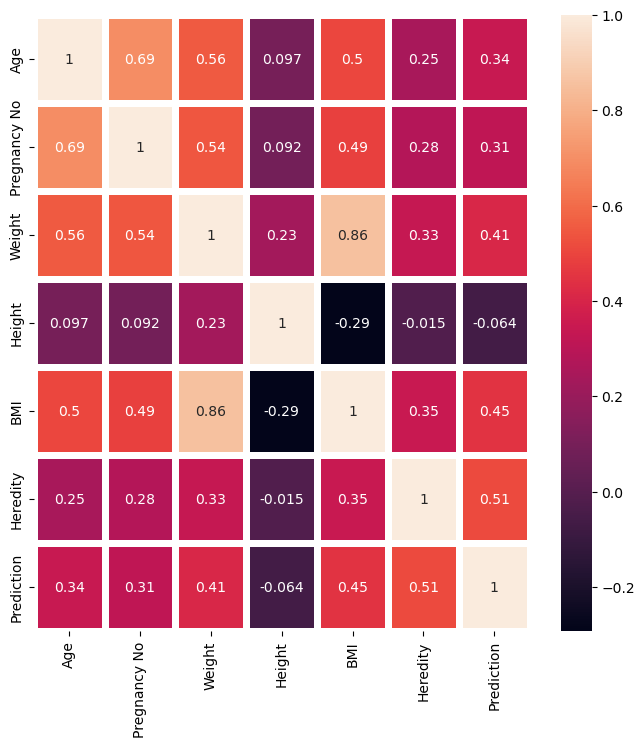

In [28]:
correlation_matriz = df_gestacional.corr()
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

# Obs.: Foram removidas as colunas `Weight` e `Height` com base na Análise do **Gráfico de Correlação**:

 * **Ponto de Atenção (Multicolinearidade):**
 As colunas `Weight` e `BMI` têm uma correlação muito alta entre si (**0.86**). Isso significa que elas trazem quase a mesma informação. Para criar um modelo de Machine Learning, pode ser interessante manter apenas o `BMI` para evitar redundância.
 * **Height (-0.064):** **Irrelevante**. A altura praticamente não interfere no diagnóstico (correlação próxima de zero).


# Modelo usando **KNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = gestacional[['Age','Pregnancy No','BMI','Heredity']]
y = gestacional['Prediction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=7))
])

knn_pipe.fit(X_train, y_train)
pred = knn_pipe.predict(X_test)

acuraciaKNN = accuracy_score(y_test, pred);

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[149  10]
 [ 20  24]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       159
           1       0.71      0.55      0.62        44

    accuracy                           0.85       203
   macro avg       0.79      0.74      0.76       203
weighted avg       0.84      0.85      0.84       203



# A precisão com KNN

* **para  0** = (**não diabetico**) -> é boa;
* **Porém para 1** = (**diabeticos**) não é boa;
  * com apenas 71% e com uma sensibilidade 55%, logo metade dos casos de
diabetes gestacional não estariam sendo captadas. A matriz de confusão também mostram isso, os Falsos Negativos são 20, ou seja, o modelo previu 0 mas era 1.

>**PRECISION** = quando o modelo diz ter diabetes, quantos de fato foram os acertos.
>
>**RECALL** = de todos que tem, qual realmente encontra.



ABAIXO: TREINAMOS DE MODELO COM Regressão Logistica E CALIBRAMOS O LIMIAR PARA 30%

In [30]:
print(f"Acuracia KNN: {acuraciaKNN:.2%}")

Acuracia KNN: 85.22%


In [31]:
threshold = 0.25

# Modelo usando **Regressão Logistica**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = gestacional[['Age','Pregnancy No','BMI','Heredity']]
y = gestacional['Prediction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

pipe.fit(X_train, y_train)


proba = pipe.predict_proba(X_test)[:, 1]
pred = (proba >= threshold).astype(int)

acuraciaLogistica = accuracy_score(y_test, pred);

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[91 68]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.97      0.57      0.72       159
           1       0.38      0.93      0.54        44

    accuracy                           0.65       203
   macro avg       0.67      0.75      0.63       203
weighted avg       0.84      0.65      0.68       203



In [33]:
print(f"Acuracia LogisticRegression: {acuraciaLogistica:.2%}")

Acuracia LogisticRegression: 65.02%


# A precisão com Regressão Logística

* **para 0 = (não diabetico)** -> A precisão é altíssima (97%), mas o modelo "jogou" muitas pessoas saudáveis para a categoria de doentes, errando muito na classificação geral (Recall baixo de 57%);
* **Porém para 1 = (diabeticos)** o cenário se inverteu drasticamente:

    * A precisão caiu muito para **38%** (muitos alarmes falsos), mas a sensibilidade (**Recall**) foi excelente: **93%**.
    * A matriz de confusão mostra que ele **errou apenas 3 casos positivos** (Falsos Negativos = 3). Ou seja, de todas as mulheres que tinham diabetes, ele encontrou quase todas.
    * O "preço" disso foi classificar 68 mulheres saudáveis como doentes (Falsos Positivos).

**PRECISION** = quando diz que é diabético, ele erra a maioria (apenas 38% de certeza).

**RECALL** = de todos que têm a doença, ele encontrou incríveis 93% (quase não deixa ninguém passar sem diagnóstico).

#AGORA criamos uma função para gerar valores aleátorios para **testar**.

In [ ]:
import numpy as np
import pandas as pd

def gerar_X_aleatorio(n=5, random_state=42):
    rng = np.random.default_rng(random_state)

    age_min, age_max = gestacional['Age'].quantile([0.01, 0.99])
    h_min, h_max     = gestacional['Height'].quantile([0.01, 0.99])
    w_min, w_max     = gestacional['Weight'].quantile([0.01, 0.99])

    age = rng.uniform(age_min, age_max, size=n)
    preg = rng.integers(1, 10, size=n)
    height = rng.uniform(h_min, h_max, size=n)
    weight = rng.uniform(w_min, w_max, size=n)
    hered = rng.integers(0, 2, size=n)

    bmi = weight / ( (height/100) ** 2 )

    X_rand = pd.DataFrame({
        'Age': np.round(age, 1),
        'Pregnancy No': preg.astype(float),
        'BMI': np.round(bmi, 1),
        'Heredity': hered.astype(int)
    })
    return X_rand

In [35]:
X_rand = gerar_X_aleatorio(n=10, random_state=7)
print(X_rand)

    Age  Pregnancy No   BMI  Heredity
0  34.5           8.0  31.0         1
1  42.1           3.0  25.2         0
2  38.7           4.0  37.1         1
3  23.3           3.0  32.8         0
4  25.4           7.0  26.3         0
5  41.5           3.0  35.0         0
6  17.1           9.0  28.8         1
7  40.0           5.0  18.4         1
8  39.3           5.0  28.6         1
9  30.1           5.0  43.6         0


In [36]:
proba_rand = pipe.predict_proba(X_rand)[:, 1]
pred_rand  = (proba_rand >= threshold).astype(int)

resultado = X_rand.copy()
resultado['proba_ter_diabetes'] = np.round(proba_rand, 4)
resultado[f"predição_com_thr_{threshold}"] = pred_rand
resultado

,Age,Pregnancy No,BMI,Heredity,proba_ter_diabetes,predição_com_thr_0.25
0,34.5,8.0,31.0,1,0.8987,1
1,42.1,3.0,25.2,0,0.2459,0
2,38.7,4.0,37.1,1,0.9482,1
3,23.3,3.0,32.8,0,0.3072,1
4,25.4,7.0,26.3,0,0.2137,0
5,41.5,3.0,35.0,0,0.5964,1
6,17.1,9.0,28.8,1,0.7549,1
7,40.0,5.0,18.4,1,0.5345,1
8,39.3,5.0,28.6,1,0.8465,1
9,30.1,5.0,43.6,0,0.8054,1


# AQUI ACIMA, esta um teste com valores aleatórios **threshold**.

# Modelo usando **Random Forest**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:,1]
pred = (proba >= threshold).astype(int)

acuraciaRandom = accuracy_score(y_test, pred);

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[127  32]
 [ 10  34]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       159
           1       0.52      0.77      0.62        44

    accuracy                           0.79       203
   macro avg       0.72      0.79      0.74       203
weighted avg       0.84      0.79      0.81       203



# A precisão com Random Forest

* **para 0 = (não diabetico)** -> continua excelente (precisão de 93%);
* **Porém para 1 = (diabeticos)** o comportamento mudou em relação ao KNN:

    * A precisão caiu para **52%**, mas a sensibilidade (**Recall**) subiu para **77%**. Isso significa que este modelo é melhor para não deixar passar casos despercebidos.
    * A matriz de confusão mostra essa melhoria na detecção: os **Falsos Negativos caíram para apenas 10** (no KNN eram 20). Ou seja, o modelo errou menos ao dizer que um doente estava saudável.
    * O "custo" disso foi o aumento dos Falsos Positivos (32): o modelo dá mais "alarmes falsos", dizendo que pessoas saudáveis têm diabetes.

**PRECISION** = quando o modelo diz ter diabetes, acerta apenas 52% das vezes (muitos alarmes falsos).

**RECALL** = de todos que realmente têm a doença, o modelo encontrou 77% (ótimo para triagem, pois "deixa escapar" menos doentes).

In [38]:
print(f"acuraciaRandom:  {acuraciaRandom:.2%}")

acuraciaRandom:  79.31%


In [39]:
X_test.shape

(203, 4)

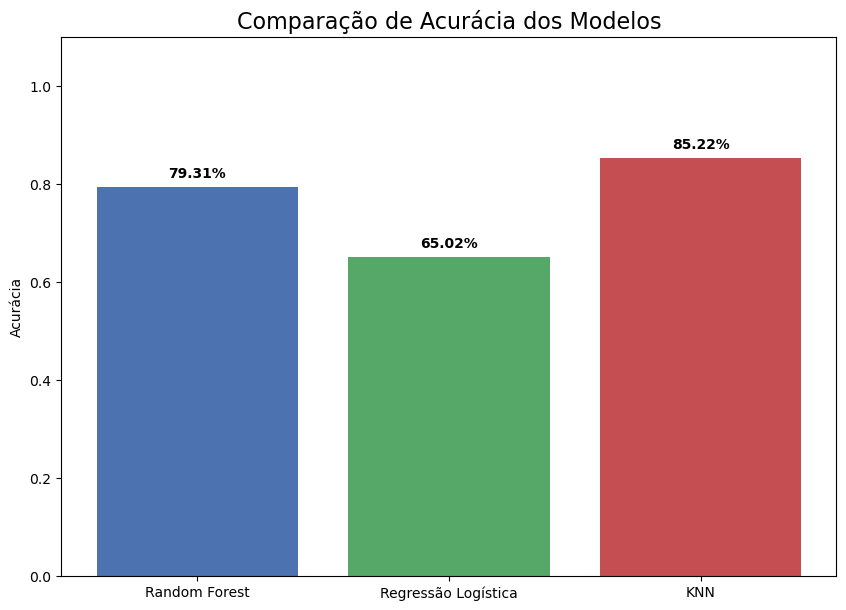

In [40]:
modelos = ["Random Forest", "Regressão Logística", "KNN"]
acuracias = [acuraciaRandom, acuraciaLogistica, acuraciaKNN]

plt.figure(figsize=(10, 7))
plt.bar(modelos, acuracias, color=['#4c72b0', '#55a868', '#c44e52'])

plt.title('Comparação de Acurácia dos Modelos', fontsize=16)
plt.ylabel('Acurácia')
plt.ylim(0, 1.1)

for i, v in enumerate(acuracias):
    plt.text(i, v + 0.02, f"{v:.2%}" , ha='center', fontweight='bold')

# 📊 Qual o melhor modelo e por qual motivo?

Levando em consideração a **Acurácia** apresentada no gráfico e a natureza do problema (saúde/diagnóstico), a análise é a seguinte:

### 🏆 O Vencedor: Random Forest (79.31%)

Embora o **KNN** tenha a maior acurácia numérica (**85.22%**), o **Random Forest** é o modelo mais equilibrado e seguro para uso médico neste caso.

### Os Motivos:

* **1. O perigo do KNN (Acurácia 85%):**
    Apesar de acertar muito no geral, ele tem um **Recall de apenas 55%** para a doença. Isso significa que ele deixaria quase metade das mulheres doentes irem para casa achando que estão saudáveis. Em medicina, isso é perigoso (alto risco de Falsos Negativos).

* **2. O exagero da Regressão Logística (Acurácia 65%):**
    Ele tem um Recall fantástico (**93%**), mas gera muitos **falsos positivos** (assusta pacientes saudáveis à toa) e tem a pior acurácia geral.

* **3. O equilíbrio do Random Forest (Acurácia 79%):**
    * Ele mantém uma boa acurácia geral (próxima de 80%).
    * Ele tem um **Recall de 77%**, ou seja, detecta muito melhor a doença do que o KNN, sem gerar tanto "alarme falso" quanto a Regressão Logística.

> **Conclusão:** Escolha o **Random Forest** por oferecer o melhor balanço entre *acertar quem é saudável* e *não deixar passar quem está doente*.